# Implementation of QFT64 using Local Backend Quantum Simulator

Team: Martha Domhöfer Mdomhoefer 963746, Taher Habib 976751 thabib, Maksims Ivanovs (guest student), Ronja von Kittlitz rvonkittlitz 970638, Lara Schmidt laraschmidt 963678, Saranraj Nambusubramaniyan 962621, Leonhard von Heinz 

In [0]:
#!pip install qiskit

In [0]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer, IBMQ
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer, qx_color_scheme,plot_histogram



### Quantum circuit with QFT64 implementation for 6 Qbits using Hadamard and Controlled-U1 Gates

In [0]:

def qft6(circ, q, n):
  
  '''Implenetation of QFT64 with 6 Qbits
  
  Args: 
  circ - Initialized Quantum Circuit
  q - Quantum circuit variable
  n - Number of Qbits
  
  Returns:
  circ - Quantum circuit for the problem'''
  
  # Variable definitions
  # k - Target qbits
  # j - Controller qbits
  # n - Number of Qbits
  
  for k in reversed(range(n)):
    
    circ.h(q[k]) 
    for j in reversed(range(k)):
      
      circ.cu1(math.pi/float(2**(k-j)), q[j], q[k])

### Initialize the quantum circuit with quantum and classical bit variables

In [0]:
q = QuantumRegister(6, "q")  # Init Quantum bit variable
c = ClassicalRegister(6, "c") # Init Classical bit variable

qftcirc = QuantumCircuit(q, c, name="qft6") # Init Quantum circuit variable

### Build the circuit individually for each qbit iteratively

In [0]:
qft6(qftcirc, q, 6)  # Function call to build the Qunatum circuit 
qftcirc.barrier()   # Barrier, to not to measure the quantum state only at the end for all q-bit circuit
for j in range(6):  # For each qbit circuit apply measuring gate towards its corresponding c-bit iteratively
  qftcirc.measure(q[j], c[j])  

### Draw and verify the circuit

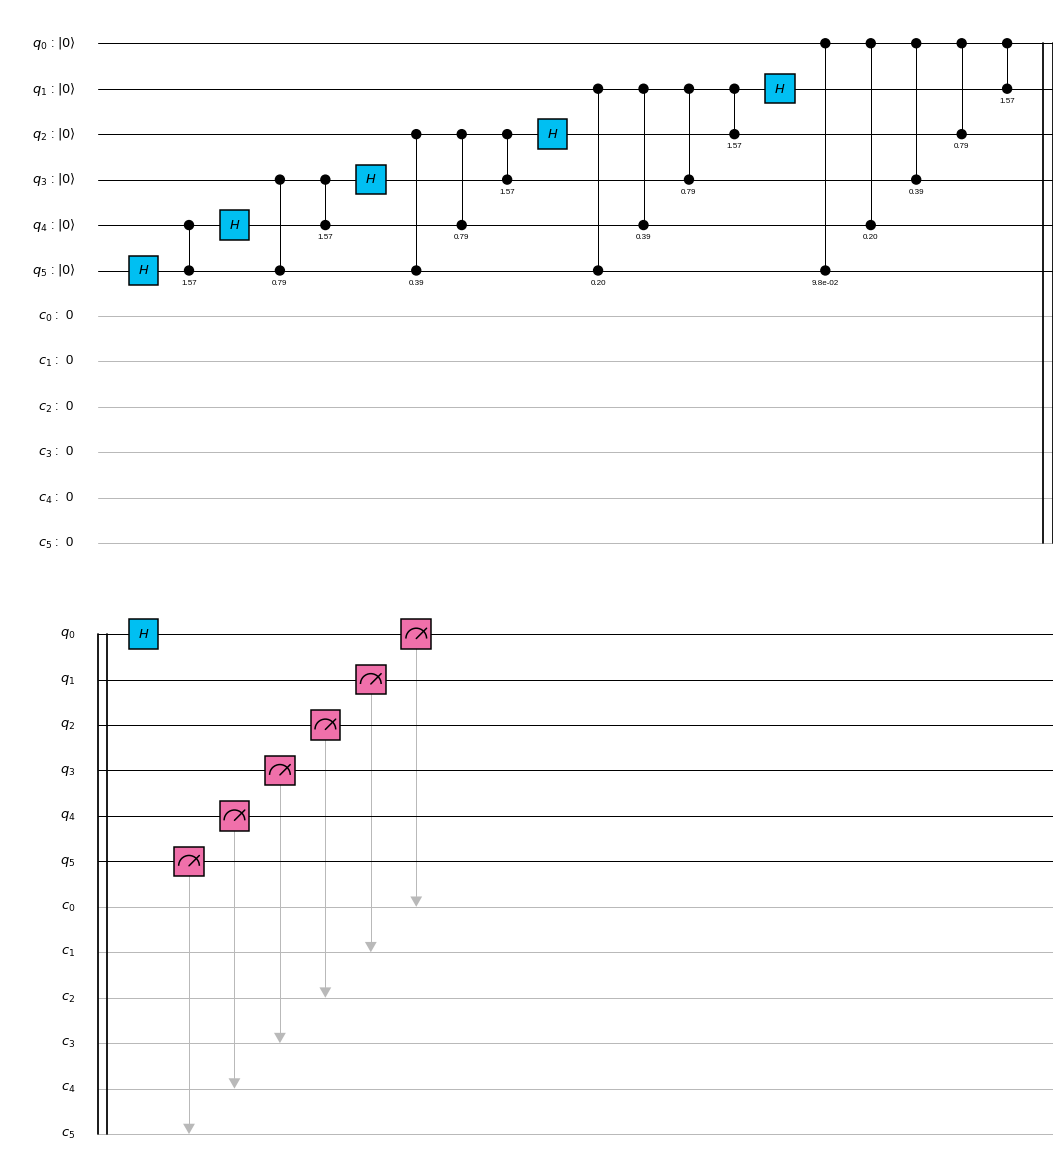

In [7]:
drawer(qftcirc,style=qx_color_scheme())

### Run the Simulator using the local quantum simulator QASM_Simulator

In [0]:
#print('Qasm simulator')
sim_backend = Aer.get_backend('qasm_simulator')
job = execute([qftcirc], sim_backend, shots=1024) # 1024 Trials
result = job.result()


### Plot the probability distribution

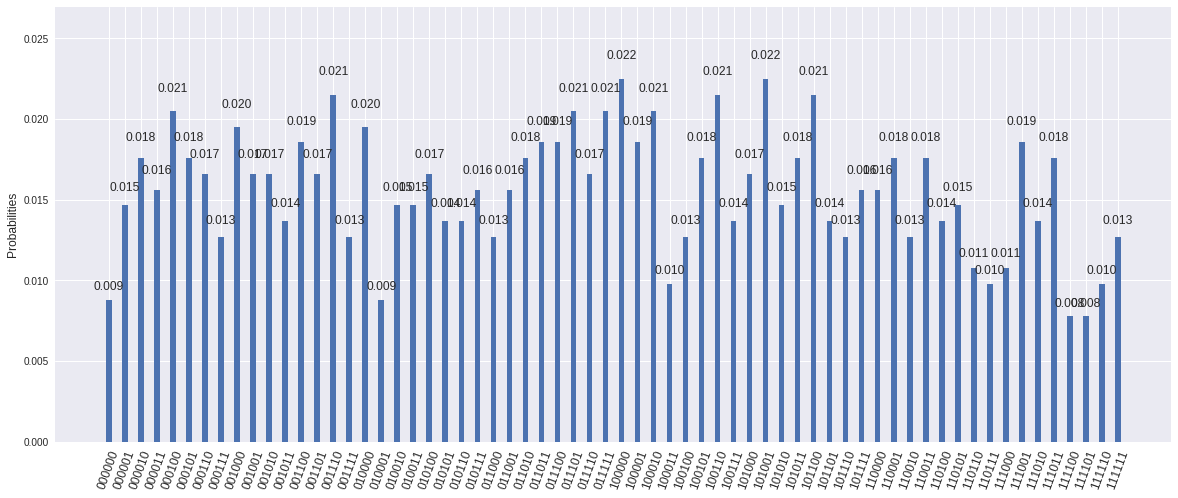

In [9]:

plot_histogram(result.get_counts(qftcirc), options = {'width': 20, 'height': 8})

### Analysing on properties of Quantum fourier transform using 3Qbit QFT8 

In [0]:
def qft3(circ, q, n):
  
  '''Implenetation of QFT8 with 3 Qbits
  
  Args: 
  circ - Initialized Quantum Circuit
  q - Quantum circuit variable
  n - Number of Qbits
  
  Returns:
  circ - Quantum circuit for the problem'''
  
  # Variable definitions
  # k - Target qbits
  # j - Controller qbits
  # n - Number of Qbits
  
  for k in reversed(range(n)):
    
    circ.h(q[k]) 
    for j in reversed(range(k)):
      
      circ.cu1(math.pi/float(2**(k-j)), q[j], q[k])

In [0]:
q = QuantumRegister(3, "q")  # Init Quantum bit variable
c = ClassicalRegister(3, "c") # Init Classical bit variable

qftcirc3 = QuantumCircuit(q, c, name="qft3") # Init Quantum circuit variable

In [0]:
qft3(qftcirc3, q, 3)  # Function call to build the Qunatum circuit 
qftcirc3.barrier()   # Barrier, to not to measure the quantum state only at the end for all q-bit circuit
for j in range(3):  # For each qbit circuit apply measuring gate towards its corresponding c-bit iteratively
  qftcirc3.measure(q[j], c[j]) 

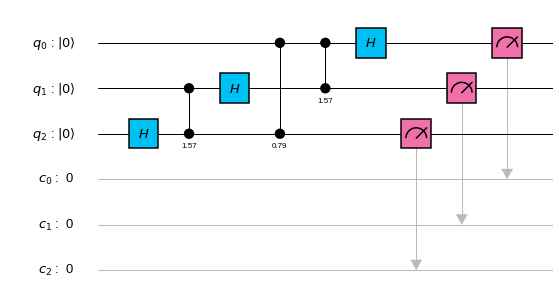

In [14]:
drawer(qftcirc3,style=qx_color_scheme())

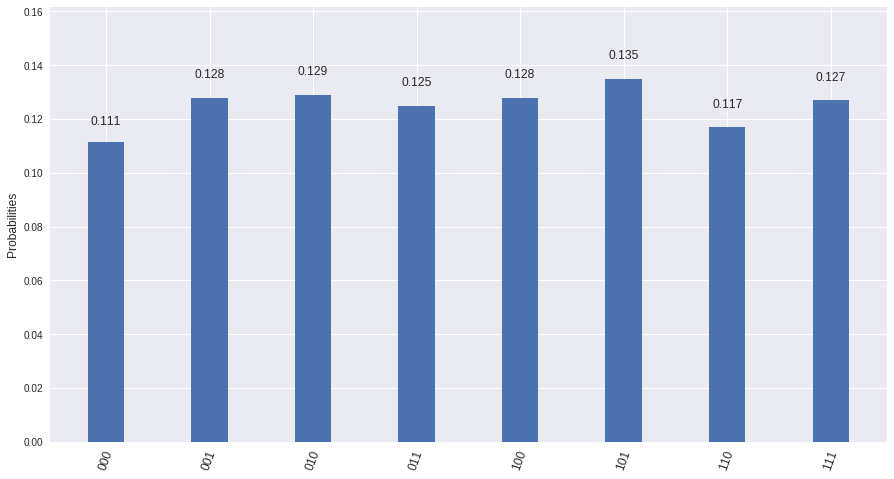

In [24]:
#print('Qasm simulator')
sim_backend = Aer.get_backend('qasm_simulator')
job3 = execute([qftcirc3], sim_backend, shots=1024) # 1024 Trials
result3 = job3.result()

plot_histogram(result3.get_counts(qftcirc3), options = {'width': 15, 'height': 8})

# What happens when we change the input state of a bit?

In [20]:
q = QuantumRegister(3, "q")  # Init Quantum bit variable
c = ClassicalRegister(3, "c") # Init Classical bit variable

qftcirc3 = QuantumCircuit(q, c, name="qft3") # Init Quantum circuit variable
qftcirc3.x(q[0])

In [0]:
qft3(qftcirc3, q, 3)  # Function call to build the Qunatum circuit
qftcirc3.barrier()   # Barrier, to not to measure the quantum state only at the end for all q-bit circuit
for j in range(3):  # For each qbit circuit apply measuring gate towards its corresponding c-bit iteratively
  qftcirc3.measure(q[j], c[j]) 

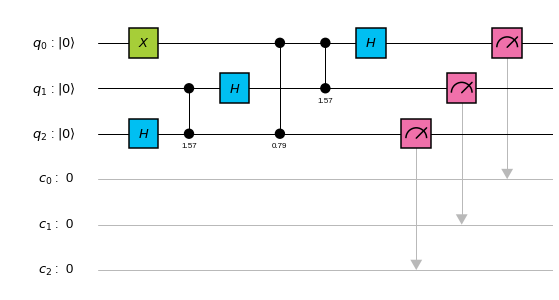

In [22]:
drawer(qftcirc3,style=qx_color_scheme())

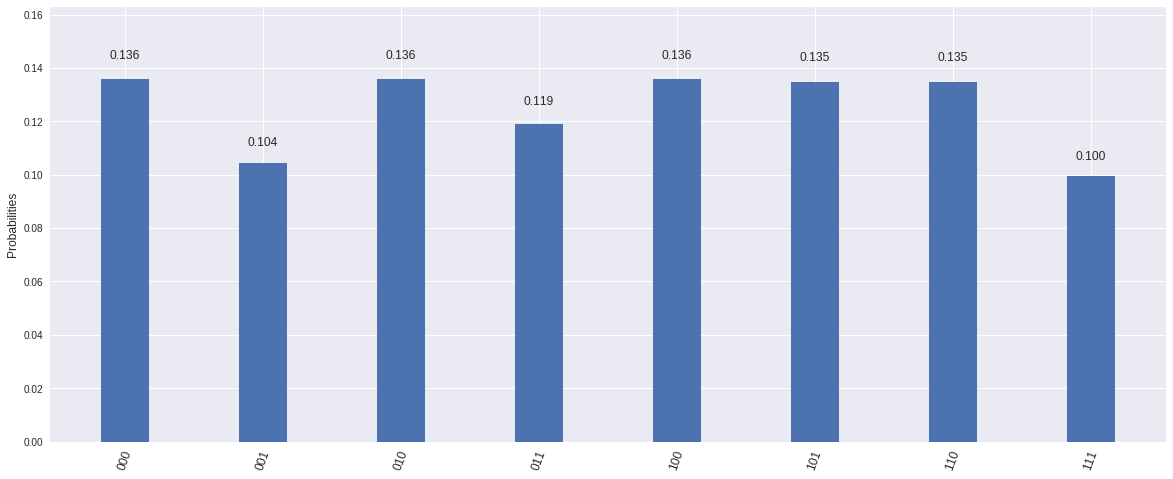

In [23]:
#print('Qasm simulator')
sim_backend = Aer.get_backend('qasm_simulator')
job3 = execute([qftcirc3], sim_backend, shots=1024) # 1024 Trials
result3 = job3.result()

plot_histogram(result3.get_counts(qftcirc3), options = {'width': 15, 'height': 8})

### We acheive similar uniform probability distribution as we excpected

### But what if we leave one qbit in superposition before applying qft??? 

In [33]:
q = QuantumRegister(3, "q")  # Init Quantum bit variable
c = ClassicalRegister(3, "c") # Init Classical bit variable

qftcirc3 = QuantumCircuit(q, c, name="qft3") # Init Quantum circuit variable
qftcirc3.h(q[2])

In [0]:
qft3(qftcirc3, q, 3)  # Function call to build the Qunatum circuit
qftcirc3.barrier()   # Barrier, to not to measure the quantum state only at the end for all q-bit circuit
for j in range(3):  # For each qbit circuit apply measuring gate towards its corresponding c-bit iteratively
  qftcirc3.measure(q[j], c[j]) 

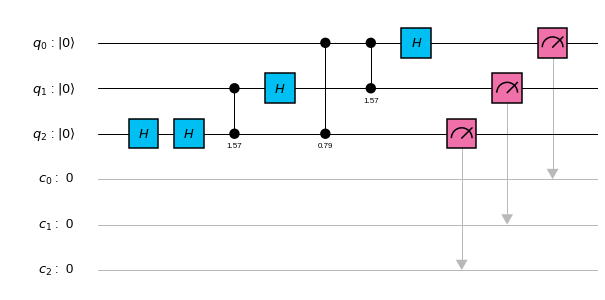

In [35]:
drawer(qftcirc3,style=qx_color_scheme())

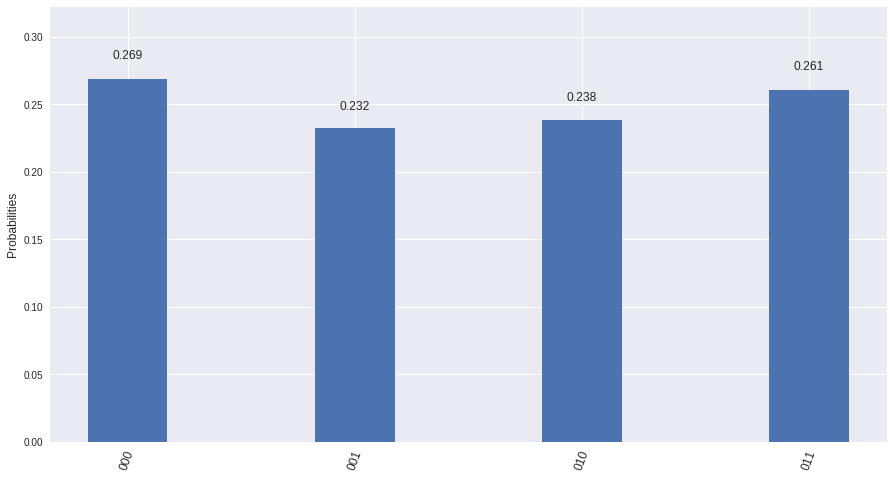

In [36]:
#print('Qasm simulator')
sim_backend = Aer.get_backend('qasm_simulator')
job3 = execute([qftcirc3], sim_backend, shots=1024) # 1024 Trials
result3 = job3.result()

plot_histogram(result3.get_counts(qftcirc3), options = {'width': 15, 'height': 8})

Hadamard transform on 1st bit destroys 1 state

2nd bit destroys 2nd bit

3rd bit destroy 8 bits


